In [143]:
import gzip
from collections import defaultdict
import scipy
import scipy.optimize
import numpy
import random
import numpy as np 
import pandas as pd
from IPython.display import HTML, display


# import warnings filter
import warnings
from warnings import simplefilter
# ignore all future warnings

### Instructions

You will need the following files:

* Polish Bankruptcy data : https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+
data

* Code examples : http://jmcauley.ucsd.edu/code/week2.py (classification) and http://jmcauley.ucsd.
edu/code/week3.py (clustering/communities)


## Tasks — Diagnostics (week 2):
In the first homework, we had two issues with the classifiers we built. Namely (1) the data were not shuffled, and (2) the labels were highly imbalanced. Both of these made it difficult to effectively build an accurate classifier. Here we’ll try and correct for those issues using the Bankruptcy dataset.

**1. Download and parse the bankruptcy data. We’ll use the 5year.arff file. Code to read the data is
available in the stub.**

In [107]:
f = open("data/5year.arff", 'r')

In [108]:
while not '@data' in f.readline(): # filter past odd lines
    pass

In [109]:
dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

**Train a logistic regressor (e.g. sklearn.linear model.LogisticRegression) with
regularization coefficient C = 1.0. Report the accuracy and Balanced Error Rate (BER) of your classifier (1 mark).**

In [110]:
X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

In [111]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X, y)

c:\users\steph\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
predictions = model.predict(X)
correctPredictions = predictions == y

In [113]:
accuracy = sum(correctPredictions) / len(correctPredictions)
accuracy

0.9660178159023425

In [114]:
from sklearn import metrics
BER = metrics.balanced_accuracy_score(y, predictions) 
BER

0.5140230554495612

**2. (CSE158 only) Retrain the above model using the class weight=’balanced’ option. Report the
accuracy and BER of your new classifier (1 mark).**

In [115]:
bal_model = linear_model.LogisticRegression(class_weight='balanced')
bal_model.fit(X, y)

c:\users\steph\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
bal_pred = model.predict(X)
correctPred = bal_pred == y

In [117]:
bal_accuracy = sum(correctPred) / len(correctPred)
bal_accuracy

0.9660178159023425

In [118]:
bal_BER = metrics.balanced_accuracy_score(y, bal_pred) 
bal_BER

0.5140230554495612

**3. Shuffle the data, and split it into training, validation, and test splits, with a 50/25/25% ratio. Using the class weight=’balanced’ option, and training on the training set, report the training/validation/test accuracy and BER (1 mark).**

In [119]:
# read in data again
f = open("data/5year.arff", 'r')
while not '@data' in f.readline(): # filter past odd lines
    pass

In [120]:
dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

In [121]:
import random
random.shuffle(dataset)
X = [values[:-1] for values in dataset]
y = [values[-1] for values in dataset]

In [122]:
# split the data
N = len(X)
fifty = int(np.around(N*.5))
seventy_five = int(np.around(N*.75))

X_train = X[:fifty]
X_valid = X[fifty:seventy_five]
X_test = X[seventy_five:]

y_train = y[:fifty]
y_valid = y[fifty:seventy_five]
y_test = y[seventy_five:]

In [123]:
random_model = linear_model.LogisticRegression(class_weight='balanced')
random_model.fit(X_train, y_train)

c:\users\steph\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictionsTrain = random_model.predict(X_train)
predictionsValid = random_model.predict(X_valid)
predictionsTest = random_model.predict(X_test)

correctPredictionsTrain = predictionsTrain == y_train
correctPredictionsValid = predictionsValid == y_valid
correctPredictionsTest = predictionsTest == y_test

In [125]:
# Training Results

In [126]:
train_accuracy = sum(correctPredictionsTrain) / len(correctPredictionsTrain)
train_accuracy

0.7519788918205804

In [127]:
train_BER = metrics.balanced_accuracy_score(y_train, predictionsTrain) 
train_BER

0.7652594720984609

In [128]:
# Validation Results

In [129]:
valid_accuracy = sum(correctPredictionsValid) / len(correctPredictionsValid)
valid_accuracy

0.7556142668428005

In [130]:
valid_BER = metrics.balanced_accuracy_score(y_valid, predictionsValid) 
valid_BER

0.7664261013381446

In [131]:
# Testing Results

In [132]:
test_accuracy = sum(correctPredictionsTest) / len(correctPredictionsTest)
test_accuracy

0.758575197889182

In [133]:
test_BER = metrics.balanced_accuracy_score(y_test, predictionsTest) 
test_BER

0.7399454297407912

**4. Implement a complete regularization pipeline with the balanced classifier. Consider values of C in the range {10^-4, 10^-3, . . . , 10^3, 10^4}. Report (or plot) the train, validation, and test BER for each value of C. Based on these values, which classifier would you select (in terms of  generalization performance) and why (1 mark)?**

In [134]:
c_model = [10**i for i in range(-4, 5)]
c_model

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [153]:
train_BER = []
valid_BER = []
test_BER = []

q_5_info = []

# to find BER, i need to compare the actual labels with the predicted labels 
from sklearn.linear_model import RidgeClassifier

for mod in c_model:        
    reg_model = RidgeClassifier(mod, class_weight='balanced', fit_intercept=False)
    reg_model.fit(X_train, y_train)
            
    predictionsTrain = reg_model.predict(X_train)
    predictionsValid = reg_model.predict(X_valid)
    predictionsTest = reg_model.predict(X_test)

    correctPredictionsTrain = predictionsTrain == y_train
    correctPredictionsValid = predictionsValid == y_valid
    correctPredictionsTest = predictionsTest == y_test
    
    train_accuracy = sum(correctPredictionsTrain) / len(correctPredictionsTrain)
    train_BER.append( metrics.balanced_accuracy_score(y_train, predictionsTrain))
    
    valid_accuracy = sum(correctPredictionsValid) / len(correctPredictionsValid)
    valid_BER.append(metrics.balanced_accuracy_score(y_valid, predictionsValid)) 

    test_accuracy = sum(correctPredictionsTest) / len(correctPredictionsTest)
    test_BER.append(metrics.balanced_accuracy_score(y_test, predictionsTest)) 
    
    if mod == 1: # save model for question 5
        q_5_info = q_5_info + [y_test, predictionsTest]

c:\users\steph\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.511e-17): result may not be accurate.
  overwrite_a=True).T


In [154]:
df = pd.DataFrame({'Training BER': train_BER, 'Validation BER': valid_BER,'Testing BER': test_BER})
df.index = c_model
df = df.rename_axis('C Values')
df

,Training BER,Validation BER,Testing BER
C Values,,,
0.0001,0.897915,0.801571,0.763383
0.0010,0.897229,0.827996,0.762701
0.0100,0.896886,0.827319,0.762701
0.1000,0.897572,0.800218,0.764065
1.0000,0.880280,0.800218,0.760655
10.0000,0.855438,0.849008,0.751105
100.0000,0.832445,0.830740,0.778145
1000.0000,0.815973,0.813825,0.792224
10000.0000,0.768453,0.756240,0.748131


In [155]:
# Use validation set BER (Balanced Error Rate) to choose the best value of C
print('Based on these values, I would select {} as my C value because it gives the smallest balanced error rate'.format(df['Validation BER'].idxmin()))

Based on these values, I would select 10000.0 as my C value because it gives the smallest balanced error rate


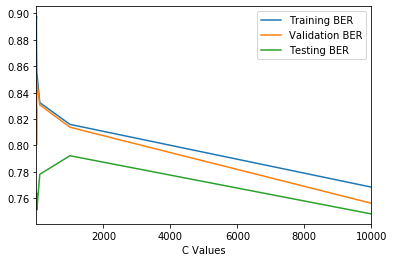

In [156]:
df.plot(kind='line')

**5. (CSE158 only) Compute the Fβ scores for β = 1, β = 0.1, and β = 10 for the above classifier, using
C = 1 (on the test set) (1 mark).**
<table><tr><td><img src="imgs/F_b_score.png"></td><td><img src="imgs/prec_recall.png"></td></tr></table>

In [144]:
from sklearn.metrics import precision_score # (y_true, y_pred)
from sklearn.metrics import recall_score # (y_true, y_pred)

In [146]:
def F_bscore(prec, rec, b):
    return (1 + b**2) * ((prec * rec) / ((b**2 * prec) + rec))

In [169]:
scores = []

# Recall: q_5_info = [y_test, predictionsTest]
b_list = [1, 0.1, 10]
for b in b_list:
    precision = precision_score(q_5_info[0], q_5_info[1]) 
    recall = recall_score(q_5_info[0], q_5_info[1])
    scores.append(F_bscore(precision, recall, b))
    
df = pd.DataFrame({'B = 1': [scores[0]], 'B = 0.01': [scores[1]], 'B = 10': [scores[2]]})
df = df.rename_axis('Fβ Score')
df

,B = 1,B = 0.01,B = 10
Fβ Score,,,
0,0.25,0.156513,0.620822


### Tasks — Dimensionality Reduction (week 3):
Next we’ll consider using PCA to build a lower-dimensional feature vector to do prediction.

**7. Following the stub code, compute the PCA basis on the training set. Report the first PCA component
(i.e., pca.components_[0]) (1 mark).**


**8. Next we’ll train a model using a low-dimensional feature vector. By representing the data in the above
basis, i.e.:**

**Xpca_train = numpy.matmul(Xtrain, pca.components_.T)
Xpca_valid = numpy.matmul(Xvalid, pca.components_.T)
Xpca_test = numpy.matmul(Xtest, pca.components_.T)**

**compute the validation and test BER of a model that uses just the first N components (i.e., dimensions) for N = 5, 10, . . . , 25, 30. Again use class weight=’balanced’ and C = 1.0 (2 marks).**